# Trying GECKO TMY

In [50]:
# Live
i2m_url = 'https://api.dd-decaf.eu'
header = {'Authorization': ''}

In [58]:
# Locally
i2m_url = 'http://10.16.141.232:7000'
m_url = 'http://10.16.141.232:8000'
header = {'Authorization': ''}

In [2]:
import requests
import pandas
from cobra.io import model_from_dict

## GECKO1

In [4]:
sample_payload = {'sampleIds': [44], 'phaseId': 5, 'modelId': 'ecYeast7'}

In [5]:
requests.get(i2m_url + '/experiments', headers=header).json()

{'response': [{'id': 5, 'name': 'car'},
  {'id': 4, 'name': 'MD121_W3110'},
  {'id': 3, 'name': 'MD120_BW25113'},
  {'id': 2, 'name': 'MD066_BW25113'},
  {'id': 1, 'name': 'MD004_MG1655'}]}

In [19]:
r = requests.post(i2m_url + '/data-adjusted/model', json=sample_payload, headers=header)

In [22]:
m = model_from_dict(r.json()['response'][str(sample_payload['phaseId'])]['model']) 

In [23]:
m

Name,ecYeast7
Memory address,0x01193e7fd0
Number of metabolites,3437
Number of reactions,6812
Objective expression,-1.0*r_2111_reverse_58b69 + 1.0*r_2111
Compartments,"cell envelope, cytoplasm, extracellular, mitochondrion, nucleus, peroxisome, endoplasmic reticulum, golgi, lipid particle, vacuole, endoplasmic reticulum membrane, vacuolar membrane, golgi membrane, mitochondrial membrane"


In [11]:
from cameo import phenotypic_phase_plane

In [18]:
m.reactions.r_2111

Reaction identifier,r_2111
Name,growth
Memory address,0x011298f668
Stoichiometry,s_0450_c --> biomass -->
GPR,
Lower bound,0.0
Upper bound,1000.0


In [25]:
with m:
    m.reactions.DM_MNXM614_e.bounds = 0, 1000
    m.reactions.r_1714_REV.bounds = 0, 1000
    pp = phenotypic_phase_plane(m, m.reactions.r_2111, objective=m.reactions.DM_MNXM614_e,
                                source=m.reactions.r_1714_REV)

In [55]:
m.metabolites.MNXM614_e.annotation

{'CHEBI': ['CHEBI:17579',
  'CHEBI:10355',
  'CHEBI:12392',
  'CHEBI:22834',
  'CHEBI:40987'],
 'InChI': 'InChI=1S/C40H56/c1-31(19-13-21-33(3)25-27-37-35(5)23-15-29-39(37,7)8)17-11-12-18-32(2)20-14-22-34(4)26-28-38-36(6)24-16-30-40(38,9)10/h11-14,17-22,25-28H,15-16,23-24,29-30H2,1-10H3/b12-11+,19-13+,20-14+,27-25+,28-26+,31-17+,32-18+,33-21+,34-22+',
 'SMILES': 'C\\C(\\C=C\\C=C(/C)\\C=C\\C1=C(C)CCCC1(C)C)=C/C=C/C=C(\\C)/C=C/C=C(\\C)/C=C/C1=C(C)CCCC1(C)C',
 'bigg.metabolite': [],
 'charge': '0',
 'formula': 'C40H56',
 'mass': '536.8726',
 'metanetx.chemical': ['MNXM614'],
 'name': 'all-trans-beta-carotene',
 'source': 'chebi:17579'}

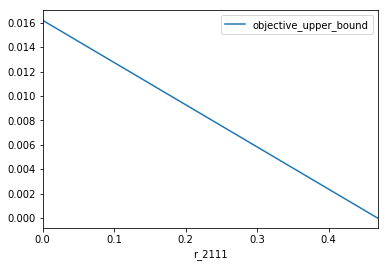

In [28]:
pp.data_frame.plot.line('r_2111', 'objective_upper_bound')

In [52]:
tmylr = requests.post(i2m_url + '/data-adjusted/maximum-yield', json=sample_payload, headers=header)

In [46]:
tmylr.json()['response']['21']['metabolites']['beta-carotene']

{'flux': [0.0007],
 'phasePlanes': {'modified': {'objective': [0.0,
    0.0008526792241588848,
    0.0017053584483177695,
    0.002558037672476654,
    0.003410716896635539,
    0.004263396120794424,
    0.005116075344953308,
    0.005968754569112194,
    0.006821433793271078,
    0.007674113017429963,
    0.008526792241588848,
    0.009379471465747732,
    0.010232150689906617,
    0.011084829914065501,
    0.011937509138224387,
    0.012790188362383272,
    0.013642867586542156,
    0.01449554681070104,
    0.015348226034859925,
    0.01620090525901881],
   'objectiveId': 'DM_MNXM614_e',
   'objectiveLowerBound': [0.0,
    0.0,
    -6.185566845057971e-17,
    -1.4716276782987028e-16,
    -1.471318292299193e-16,
    0.0,
    4.114273882808807e-18,
    0.0,
    0.0,
    -2.3547377165916173e-18,
    -5.371862877222273e-16,
    2.3354419491917694e-16,
    4.897854450510564e-16,
    7.032816646886964e-16,
    2.6791682464331295e-16,
    -2.0411161049998472e-18,
    1.8370044944998628e-17,

## GECKO proteomics

In [24]:
sample_payload = {'sampleIds': [44], 'phaseId': 5, 'modelId': 'ecYeast7_proteomics'}

In [55]:
r = requests.post(i2m_url + '/data-adjusted/model', json=sample_payload, headers=header)

In [39]:
m = model_from_dict(r.json()['response'][str(sample_payload['phaseId'])]['model']) 

In [40]:
m

Name,ecYeast7_proteomics
Memory address,0x012091b978
Number of metabolites,3437
Number of reactions,6812
Objective expression,1.0*r_1714_REV_reverse_2665e - 1.0*r_1714_REV
Compartments,"cell envelope, cytoplasm, extracellular, mitochondrion, nucleus, peroxisome, endoplasmic reticulum, golgi, lipid particle, vacuole, endoplasmic reticulum membrane, vacuolar membrane, golgi membrane, mitochondrial membrane"


In [41]:
len(m.notes['changes']['measured-missing']['reactions'])

990

In [42]:
m.reactions.prot_P00044_exchange

Reaction identifier,prot_P00044_exchange
Name,prot_P00044_exchange
Memory address,0x0121370860
Stoichiometry,--> prot_P00044_c --> prot_P00044
GPR,
Lower bound,0
Upper bound,1.72252357406386e-05


In [44]:
m.reactions.r_1714_REV

Reaction identifier,r_1714_REV
Name,D-glucose exchange (reversible)
Memory address,0x01216d4a58
Stoichiometry,--> s_0565_e --> D-glucose
GPR,
Lower bound,1.0
Upper bound,1.0


In [98]:
tmylr = requests.post(i2m_url + '/data-adjusted/maximum-yield', json=sample_payload, headers=header)

In [99]:
tmylr.json()

{'response': {'5': {'growthRate': [0.05],
   'metabolites': {'aldehydo-D-glucose': {'flux': [-1.0],
     'phasePlanes': {'modified': {'objective': [0.034104196440170986,
        0.3752866940097543,
        0.7164691915793375,
        1.057651689148921,
        1.3988341867185041,
        1.7400166842880873,
        2.081199181857671,
        2.422381679427254,
        2.7635641769968373,
        3.1047466745664205,
        3.4459291721360037,
        3.7871116697055873,
        4.128294167275171,
        4.469476664844754,
        4.810659162414337,
        5.15184165998392,
        5.493024157553504,
        5.834206655123087,
        6.17538915269267,
        6.516571650262254],
       'objectiveId': 'r_1714_REV',
       'objectiveLowerBound': [-0.034104196440170986,
        -0.3752866940097543,
        -0.7164691915793375,
        -1.057651689148921,
        -1.3988341867185041,
        -1.7400166842880873,
        -2.081199181857671,
        -2.422381679427254,
        -2.763564176